#1. Importar bibliotecas necessárias

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#2. Definir funções

In [55]:
def plotar_grafico_barras(ax, df, coluna, titulo, ylabel):
    # Prepara dados para o gráfico
    n_values = df['N'].unique()
    num_threads = df['NumThreads'].unique()

    # Configurações para o gráfico
    bar_width = 0.1
    x = np.arange(len(n_values))  # as posições dos grupos de N

    # Adiciona barras para cada número de threads
    for i, nThreads in enumerate(num_threads):
        # Filtra os dados para o valor específico de NumThreads
        subset = df[df['NumThreads'] == nThreads]

        # Posição da barra
        offset = bar_width * i

        # Adiciona as barras
        rects = ax.bar(x + offset, subset[coluna], bar_width, label=f'Threads={nThreads}')
        # ax.bar_label(rects, padding=3)

    # Configura o gráfico
    ax.set_xlabel('Valores de N')
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)
    ax.set_xticks(x + bar_width * (len(num_threads) - 1) / 2)
    ax.set_xticklabels(n_values)
    ax.legend(title='Número de Threads')

def plotar_grafico_linhas(ax, df, coluna, titulo, ylabel):
    # Prepara dados para o gráfico
    n_values = df['N'].unique()
    num_threads = df['NumThreads'].unique()

    # Configurações para o gráfico
    x = np.arange(len(n_values))  # as posições dos grupos de N

    # Adiciona linhas para cada número de threads
    for nThreads in num_threads:
        # Filtra os dados para o valor específico de NumThreads
        if nThreads != 1:
            subset = df[df['NumThreads'] == nThreads]
            ax.plot(x, subset[coluna], marker='o', label=f'Threads={nThreads}')
            # ax.set_label(subset[coluna])
            # ax.bar_label(rects, padding=3)

    # Configura o gráfico
    ax.set_xlabel('Valores de N')
    ax.set_ylabel(ylabel)
    ax.set_title(titulo)
    ax.set_xticks(x)
    ax.set_xticklabels(n_values)
    ax.legend(title='Número de Threads')

def plotar_tabela(ax, df, titulo):
    # Oculta o eixo
    ax.axis('off')
    ax.axis('tight')

    # Adiciona a tabela ao gráfico
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    ax.set_title(titulo, y=1.2)

def format_number(num):
    if isinstance(num, (int, float)):
        return f'{num:.4f}' if num % 1 != 0 else f'{int(num)}'
    return num

def completar_dados(df):
    # Completa os valores faltantes com a média dos tempos
    df['Media'] = df[['tempo1', 'tempo2', 'tempo3']].mean(axis=1)

    # Calcula o speedup
    tempo_sequencial = df[df['NumThreads'] == 1][['N', 'Media']].rename(columns={'Media': 'TempoSequencial'})
    df = df.merge(tempo_sequencial, on='N')
    df['Speedup'] = df['TempoSequencial'] / df['Media']

    # Calcula a eficiência
    df['Eficiencia'] = df['Speedup']/df['NumThreads']

    # Calcula a métrica de Karp-Flat
    df['MetricaKarpFlat'] = ((1/df['Speedup']) - (1/df['NumThreads']))/(1 - (1/df['NumThreads']))

    return df

#3. Importar dados gerados pelo bash script

In [56]:
# Leitura do arquivo CSV
from google.colab import files
# Fazer upload do arquivo
uploaded = files.upload()

df_omp = pd.read_csv('dados-omp.csv', sep='\s', engine='python')
df_pthread = pd.read_csv('dados-pthread.csv', sep='\s', engine='python')

df_omp = completar_dados(df_omp)
df_pthread = completar_dados(df_pthread)

Saving dados-pthread.csv to dados-pthread (1).csv
Saving dados-omp.csv to dados-omp (1).csv


#4. Plotar gráficos

##Gráfico mostrando a média dos tempos gastos

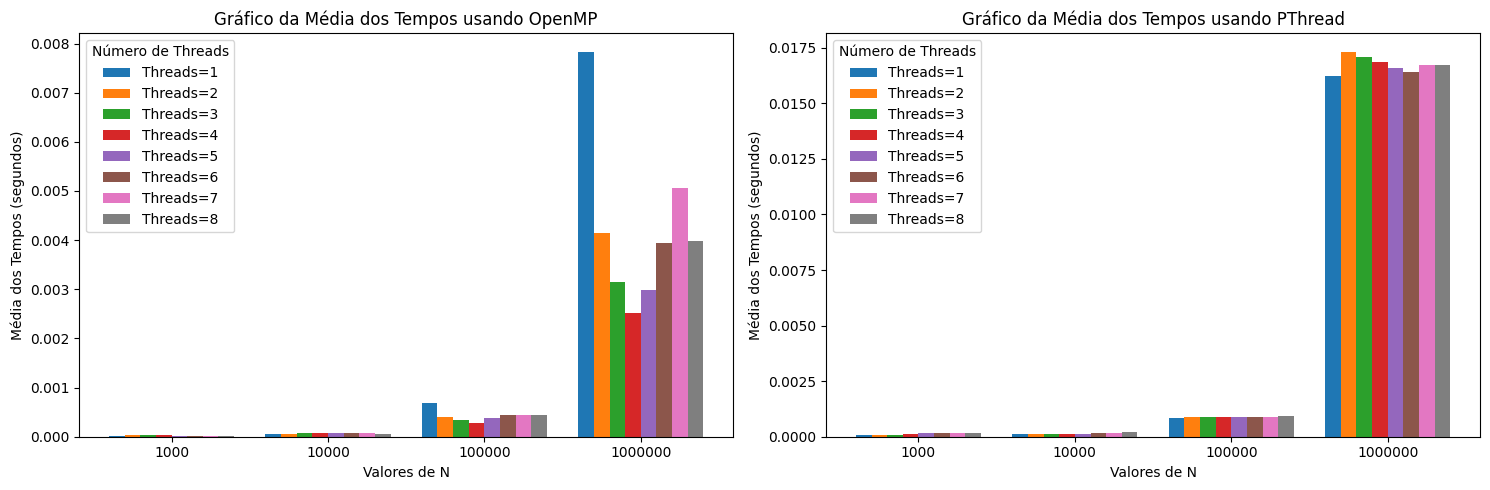

In [57]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

plotar_grafico_barras(axis[0], df_omp, 'Media', 'Gráfico da Média dos Tempos usando OpenMP', 'Média dos Tempos (segundos)')
plotar_grafico_barras(axis[1], df_pthread, 'Media', 'Gráfico da Média dos Tempos usando PThread', 'Média dos Tempos (segundos)')

# Exibe os gráficos
plt.tight_layout()
plt.show()

##Gráfico do Speedup

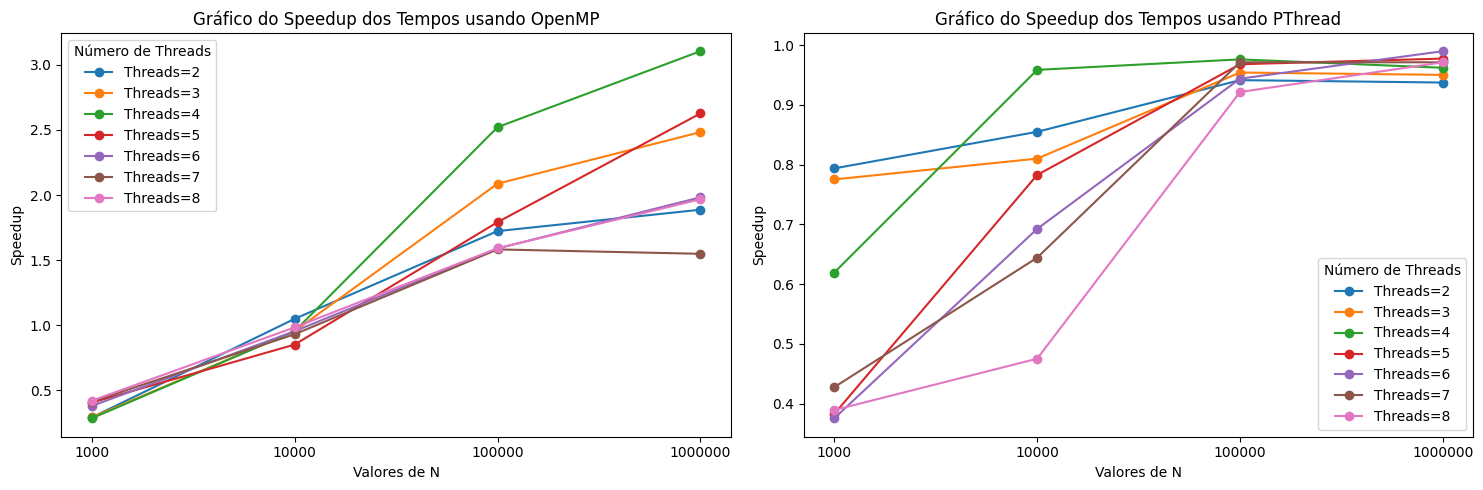

In [58]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

plotar_grafico_linhas(axis[0], df_omp, 'Speedup', 'Gráfico do Speedup dos Tempos usando OpenMP', 'Speedup')
plotar_grafico_linhas(axis[1], df_pthread, 'Speedup', 'Gráfico do Speedup dos Tempos usando PThread', 'Speedup')

# Exibe os gráficos
plt.tight_layout()
plt.show()

##Gráfico da eficiência

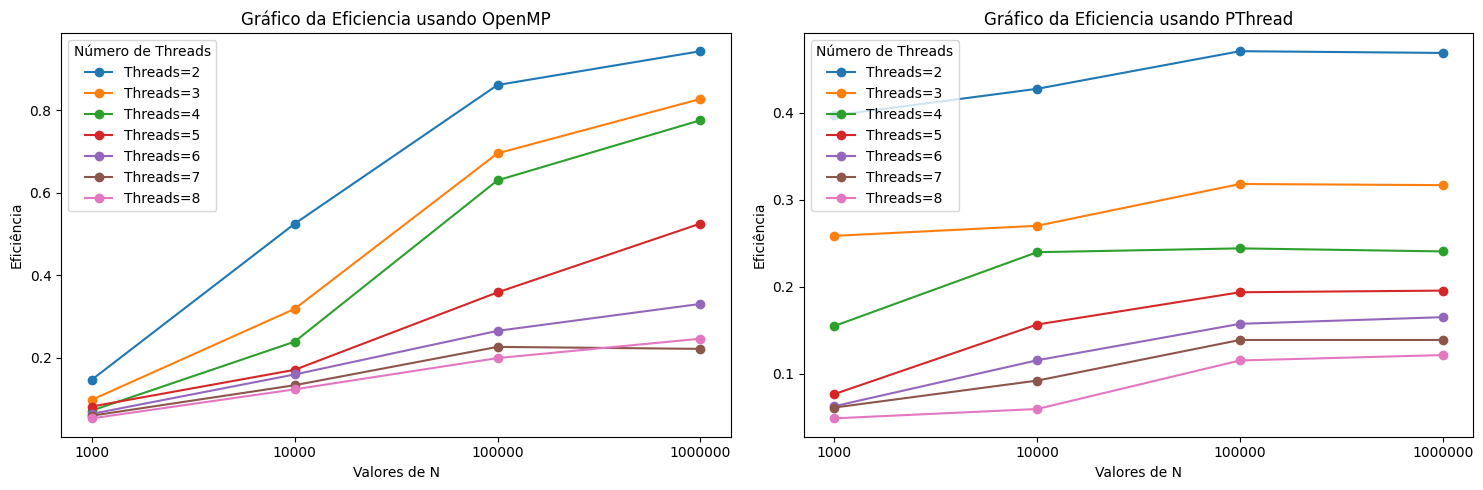

In [59]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

plotar_grafico_linhas(axis[0], df_omp, 'Eficiencia', 'Gráfico da Eficiencia usando OpenMP', 'Eficiência')
plotar_grafico_linhas(axis[1], df_pthread, 'Eficiencia', 'Gráfico da Eficiencia usando PThread', 'Eficiência')

# Exibe os gráficos
plt.tight_layout()
plt.show()

##Tabela mostrando o resultado da métrica de Karp-Flat

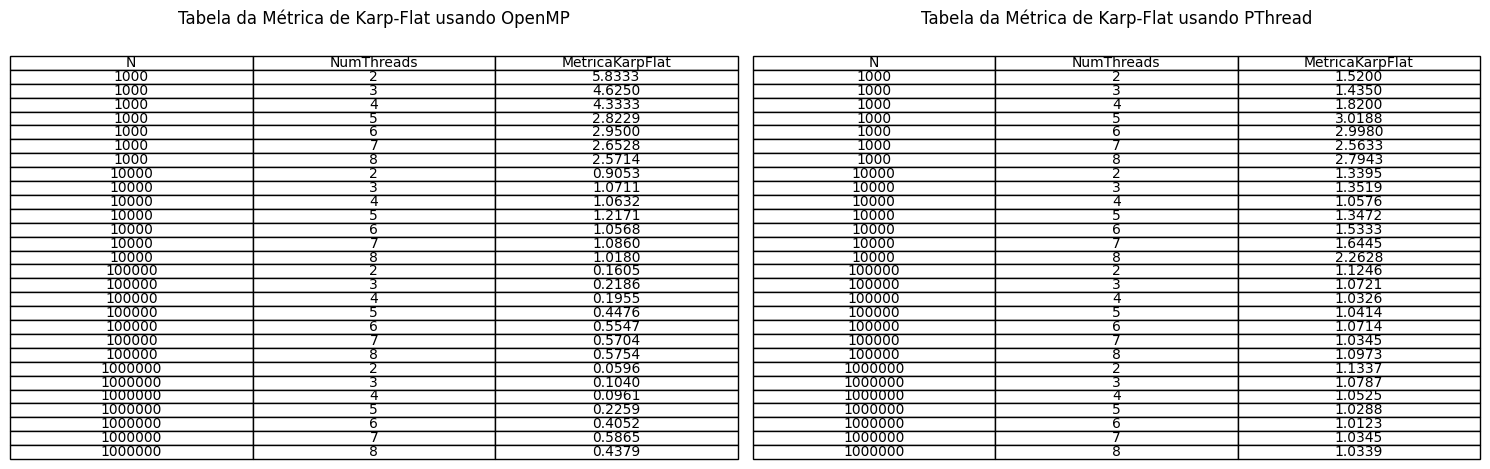

In [60]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5)) # Ajusta o tamanho da figura conforme necessário

# KarpFlat_df = df[df['NumThreads'] != 1][['N', 'NumThreads', 'MetricaKarpFlat']].map(format_number)
KarpFlat_df_omp = df_omp[df_omp['NumThreads'] != 1][['N', 'NumThreads', 'MetricaKarpFlat']].copy()
KarpFlat_df_omp['MetricaKarpFlat'] = KarpFlat_df_omp['MetricaKarpFlat'].map(format_number)
plotar_tabela(axis[0], KarpFlat_df_omp, 'Tabela da Métrica de Karp-Flat usando OpenMP')

KarpFlat_df_pthread = df_pthread[df_pthread['NumThreads'] != 1][['N', 'NumThreads', 'MetricaKarpFlat']].copy()
KarpFlat_df_pthread['MetricaKarpFlat'] = KarpFlat_df_pthread['MetricaKarpFlat'].map(format_number)
plotar_tabela(axis[1], KarpFlat_df_pthread, 'Tabela da Métrica de Karp-Flat usando PThread')


fig.tight_layout()
plt.show()